In [ ]:
%matplotlib inline


# GLCM Texture Features


This example illustrates texture classification using grey level
co-occurrence matrices (GLCMs) [1]_. A GLCM is a histogram of co-occurring
greyscale values at a given offset over an image.

In this example, samples of two different textures are extracted from
an image: grassy areas and sky areas. For each patch, a GLCM with
a horizontal offset of 5 (`distance=[5]` and `angles=[0]`) is computed.
Next, two features of the GLCM matrices are computed: dissimilarity and
correlation. These are plotted to illustrate that the classes form
clusters in feature space.
In a typical classification problem, the final step (not included in
this example) would be to train a classifier, such as logistic
regression, to label image patches from new images.

References
----------
.. [1] Haralick, RM.; Shanmugam, K.,
       "Textural features for image classification"
       IEEE Transactions on systems, man, and cybernetics 6 (1973): 610-621.
       :DOI:`10.1109/TSMC.1973.4309314` 


In [16]:
###### import cv2
import numpy as np
from matplotlib import pyplot as plt


from skimage.feature import greycomatrix, greycoprops
from skimage import data


PATCH_SIZE = 21

image = cv2.imread('IMAGES_05/images.jpeg',0)

# select some patches from balloons areas of the image
balloon_locations = [(127,54), (41,106)]
balloon_patches = []
for loc in balloon_locations:
    balloon_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(68,16), (134,123)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []


for patch in (balloon_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    #print(greycoprops(glcm, 'dissimilarity'))
    #plt.imshow(np.squeeze(glcm))
    #plt.show()
    #print(patch.max())
    #print(patch.min())
    print(glcm)
    


[[[[0.00297619]]

  [[0.0014881 ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.0014881 ]]

  [[0.        ]]

  [[0.0014881 ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.0014881 ]]

  [[0.00297619]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 ...


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]]
[[[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 ...


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]


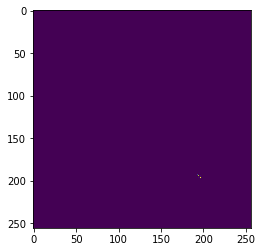

In [9]:

plt.imshow(np.squeeze(glcm))
plt.show()


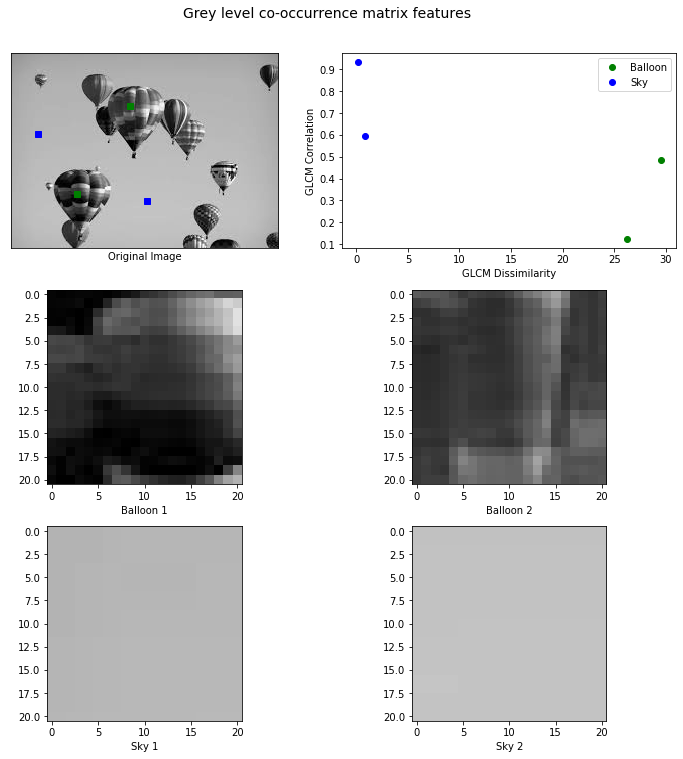

In [17]:
# create the figure
fig = plt.figure(figsize=(10, 10))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in balloon_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(balloon_patches)], ys[:len(balloon_patches)], 'go',
        label='Balloon')
ax.plot(xs[len(balloon_patches):], ys[len(balloon_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()


# display the image patches
for i, patch in enumerate(balloon_patches):
    ax = fig.add_subplot(3, len(balloon_patches), len(balloon_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Balloon %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()